In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!pip install jupyter_contrib_nbextensions

In [2]:
from sklearn.metrics import classification_report

train/test split - https://medium.com/@pytorch_geometric/link-prediction-on-heterogeneous-graphs-with-pyg-6d5c29677c70

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_pickle('appmath.pkl')  

In [5]:
df.correct.value_counts(normalize=True)

True     0.682166
False    0.317834
Name: correct, dtype: float64

In [6]:
df2=pd.read_csv('prereq_edges.csv')

In [7]:
G=nx.Graph()

for _,i in df2.iterrows():    
       
        G.add_edge(i['source_lo_title'],i['dest_lo_title'])
       

In [8]:
subgraphs=[G.subgraph(i) for i in nx.connected_components(G)]

In [9]:
for num,sub in enumerate(subgraphs):
    
    nx.set_node_attributes(sub,num,'subGraphId')

In [10]:
nodeSubGraphId={}
for g in subgraphs:
    for node in g.nodes(data=True):
         nodeSubGraphId[node[0]]= node[1]['subGraphId']

In [11]:
subgraphsNodeCountDict={ num: g.number_of_nodes() for num,g in  enumerate(subgraphs)}

In [12]:


for col in df.columns:
    if df[col].dtype.name=='category':
        df[col]=df[col].astype(str)

In [13]:
df['loGraphID']=df.learning_objective_name.apply(lambda x: nodeSubGraphId.get(x) )

In [14]:
df16=df[df.loGraphID==16].reset_index(drop=True)

In [15]:
df16=df16[~df16.correct.isna()]

In [16]:
difficulty=df16.groupby('atom_id')['correct'].mean().reset_index().rename(columns={'correct':'difficulty'})

In [17]:
difficulty

,atom_id,difficulty
0,0cdd8004-b809-49ae-aa59-fae9a0baa575,0.495935
1,113c2c7a-465f-439f-a05b-a2fa71dd4d73,0.867021
2,136d5e8f-ccef-4a13-873b-74e3b04daca0,0.591195
3,13db4de5-222b-436b-acac-32ca9a09e7fb,0.535326
4,14fc11f5-dcb5-499f-8f29-7013626bc29f,0.532258
...,...,...
80,f78b02ee-0bbc-4cc9-89b2-0efbd635850c,0.485030
81,f7956319-1ba4-46ca-9fd7-c461670cfee5,0.626822
82,f9a31b6c-a4f9-489d-9686-1a690ad8f053,0.643799
83,fe5b22c6-d86c-4192-afd4-2ab0995e9272,0.691358


In [18]:
df16=df16.merge(difficulty,how='left',on='atom_id')

<AxesSubplot:>

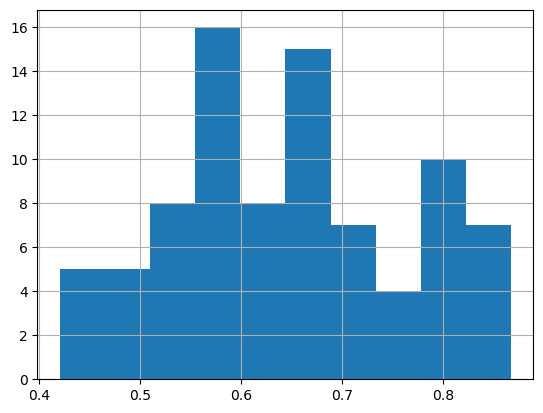

In [19]:
difficulty.difficulty.hist(bins=10)

In [20]:
pd.DataFrame(df16.groupby('user_id')['atom_id'].nunique())[(pd.DataFrame(df16.groupby('user_id')['atom_id'].nunique())>50).atom_id]

,atom_id
user_id,
13c74562-c746-452b-8486-d869bd77d81e,54
19770dd7-05b6-4b15-9f9f-5e4a3db80be0,55
26052cc4-76b7-4461-8722-fa6976262914,64
266bc869-2a67-4ad5-a249-4241114e9f6d,57
29abcf88-6580-4304-bc4a-002ff5372ca9,58
2a77669b-b645-410e-ba76-9ae222dc3af3,53
36668830-a245-4efd-ad6c-cc8d3a54c339,59
436acb45-d00e-4326-aa91-962d9fe199a8,60
570b7ecf-d43d-4909-baf2-c49f45a36305,57


In [21]:
user='f49c42dd-5889-4831-8e5f-e8512aec4e66' 

In [22]:
loIndex={lo:i for i,lo in enumerate( df16.learning_objective_name.unique())}
df16['loIndex']=df16['learning_objective_name'].apply(lambda x: loIndex[x])

loMapping=df2[(df2.source_lo_title.isin(loIndex.keys())) | (df2.dest_lo_title.isin(loIndex.keys()))]
loMapping['source_index']=loMapping.source_lo_title.map(loIndex)
loMapping['dest_index']=loMapping.dest_lo_title.map(loIndex)
loEdgeMapping=loMapping[['source_index','dest_index']].reset_index(drop=True)
loEdgeIndex=loEdgeMapping.values.transpose()

C:\Users\mpathirana\AppData\Local\Temp\ipykernel_18084\2542482812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loMapping['source_index']=loMapping.source_lo_title.map(loIndex)
C:\Users\mpathirana\AppData\Local\Temp\ipykernel_18084\2542482812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loMapping['dest_index']=loMapping.dest_lo_title.map(loIndex)


In [23]:
loEdgeIndex

array([[0, 2, 1],
       [3, 0, 2]], dtype=int64)

In [24]:
df16.loIndex.unique()

array([0, 1, 2, 3], dtype=int64)

# User_dataset func

In [25]:
def user_dataset(user):  
    df16[df16.user_id==user].correct.value_counts()

    df16['correctBinary']=df16.correct*1

    df16.atom_id=df16.atom_id.astype(str)

    userDf=df16[df16.user_id==user]

    userDf=userDf.sort_values(by='interaction_end_time')

    atomIndex={atom:i for i,atom in enumerate( userDf.atom_id)}

    #loIndex={lo:i for i,lo in enumerate( userDf.learning_objective_name.unique())}

    #userDf['loIndex']=userDf['learning_objective_name'].apply(lambda x: loIndex[x])
    userDf['atomIndex']=np.arange(userDf.shape[0])

    atomsPerLO=userDf.groupby('loIndex')['atom_id'].count().to_dict()
    userDf['atomsPerLO']=userDf['loIndex'].apply(lambda x: atomsPerLO[x])

    edgeMap=userDf[['loIndex','atomIndex']]

    y=userDf.correctBinary.astype(int).to_numpy()

    #loMapping=df2[(df2.source_lo_title.isin(loIndex.keys())) | (df2.dest_lo_title.isin(loIndex.keys()))]

    #loMapping['source_index']=loMapping.source_lo_title.map(loIndex)
    #loMapping['dest_index']=loMapping.dest_lo_title.map(loIndex)

    #loEdgeMapping=loMapping[['source_index','dest_index']].reset_index(drop=True)

    #loEdgeIndex=loEdgeMapping.values.transpose()

    loAtomEdgeIndex=edgeMap.values.transpose()

    atomAtom=edgeMap.reset_index(drop=True)[['atomIndex']]

    atomAtom['nextAtom']=atomAtom.atomIndex.shift(-1)

    atomAtom=atomAtom.dropna()

    atomEdgeIndex=atomAtom.values.transpose()

    atomFeatures=userDf.difficulty.to_numpy().reshape(-1,1)

    loFeatures=np.array(list(atomsPerLO.values())).reshape(-1,1)
    return  atomFeatures,loFeatures,loAtomEdgeIndex,atomEdgeIndex,y

In [26]:
from torch_geometric.data import HeteroData
import torch 


In [27]:
import torch_geometric.transforms as T

In [28]:
atomFeatures,loFeatures,loAtomEdgeIndex,atomEdgeIndex,y=user_dataset(user)

In [29]:
loEdgeIndex

array([[0, 2, 1],
       [3, 0, 2]], dtype=int64)

# Generate_data func

In [30]:
def generate_data(atomFeatures,loFeatures,loAtomEdgeIndex,loEdgeIndex,atomEdgeIndex,y):  
    data = HeteroData()
    data['atom'].x=torch.tensor(atomFeatures).float()
    data['lo'].x= torch.tensor(loFeatures).float()
    data['lo','lo_atom','atom'].edge_index=torch.from_numpy(loAtomEdgeIndex).long()
    data['lo','lo_lo','lo'].edge_index= torch.from_numpy(loEdgeIndex).long()
    data['atom','atom_atom','atom'].edge_index=torch.from_numpy(atomEdgeIndex).long()

    data['atom'].y=torch.from_numpy(y).long()


    #split=T.RandomNodeSplit(num_test =5)
    #data=split(data)

    size=y.shape[0]
    num_test_nodes =int(y.shape[0]*.35)
    some_indices = torch.randperm(size)[:num_test_nodes]


    test_mask = torch.zeros(y.shape[0], dtype=torch.bool)
    test_mask[some_indices] = True
    data['atom'].test_mask = test_mask

    train_mask = torch.ones(y.shape[0], dtype=torch.bool)
    train_mask[some_indices] = False
    data['atom'].train_mask = train_mask

    normalize=T.NormalizeFeatures()
    data=normalize(data)
    return data

In [31]:
data=generate_data(atomFeatures,loFeatures,loAtomEdgeIndex,loEdgeIndex,atomEdgeIndex,y)

In [32]:
data

HeteroData(
  atom={
    x=[93, 1],
    y=[93],
    test_mask=[93],
    train_mask=[93]
  },
  lo={ x=[4, 1] },
  (lo, lo_atom, atom)={ edge_index=[2, 93] },
  (lo, lo_lo, lo)={ edge_index=[2, 3] },
  (atom, atom_atom, atom)={ edge_index=[2, 92] }
)

In [33]:
print('data.has_isolated_nod : {}'.format(data.has_isolated_nodes()))
print('data.has_self_loops   : {}'.format(data.has_self_loops()))
print('data.is_undirected    : {}'.format(data.is_directed()))

data.has_isolated_nod : False
data.has_self_loops   : False
data.is_undirected    : True


In [34]:
data

HeteroData(
  atom={
    x=[93, 1],
    y=[93],
    test_mask=[93],
    train_mask=[93]
  },
  lo={ x=[4, 1] },
  (lo, lo_atom, atom)={ edge_index=[2, 93] },
  (lo, lo_lo, lo)={ edge_index=[2, 3] },
  (atom, atom_atom, atom)={ edge_index=[2, 92] }
)

In [35]:
import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.nn import SAGEConv, to_hetero

# GNN MODEL

In [36]:
class GNN(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels,requires_grad=False)
        self.conv2 = SAGEConv((-1, -1), out_channels,requires_grad=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.conv2(x, edge_index)
        return x


model = GNN(hidden_channels=64, out_channels=2)
model = to_hetero(model, data.metadata(), aggr='mean')

In [37]:
optimizer=torch.optim.Adam(model.parameters(),lr=.1)
criterion=torch.nn.CrossEntropyLoss()
def train():
    model.train()
    optimizer.zero_grad()
    out=model(data.x_dict, data.edge_index_dict)
    #print(out)
    loss=criterion(out['atom'][data['atom'].train_mask],data['atom'].y[data['atom'].train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    out=model(data.x_dict,data.edge_index_dict)
    #print(out)
    pred=out['atom'].argmax(dim=1)
    #print(out)
    test_correct=pred[data['atom'].test_mask]==data['atom'].y[data['atom'].test_mask]
    test_acc=int(test_correct.sum())/int(data['atom'].test_mask.sum())

   
    classificationReport=classification_report(data['atom'].y[data['atom'].test_mask],pred[data['atom'].test_mask])
    print(classificationReport)
    return test_acc

for epcoh in range(1,501):
    loss=train()
print('Epoch : {} , accuracy : {}'.format(epcoh,loss))
    
test()

Epoch : 500 , accuracy : 0.6019135117530823
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.78      1.00      0.88        25

    accuracy                           0.78        32
   macro avg       0.39      0.50      0.44        32
weighted avg       0.61      0.78      0.69        32



C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.78125

In [38]:
homogeneous_data = data.to_homogeneous()
g=torch_geometric.utils.to_networkx(homogeneous_data)


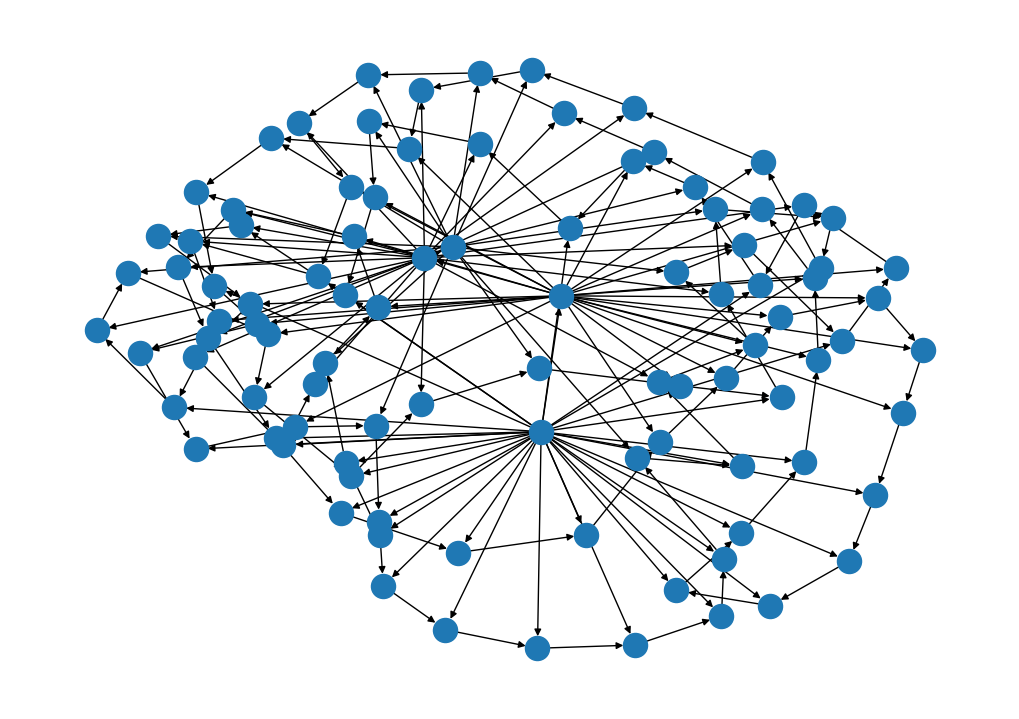

In [39]:
plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(g)

In [40]:
from torch_geometric.data import DataLoader

In [41]:
userIds=df16.user_id.unique()

In [42]:
df16.user_id.nunique()

1428

In [43]:
loEdgeIndex

array([[0, 2, 1],
       [3, 0, 2]], dtype=int64)

# Batch generation 

user_dataset > return  atomFeatures,loFeatures,loAtomEdgeIndex,atomEdgeIndex,y
generate_data >  atomFeatures,loFeatures,loAtomEdgeIndex,loEdgeIndex,atomEdgeIndex,y

In [44]:
dataList=[]
for i in userIds:
    atomFeatures,loFeatures,loAtomEdgeIndex,atomEdgeIndex,y=user_dataset(i)
    data=generate_data(atomFeatures,loFeatures,loAtomEdgeIndex,loEdgeIndex,atomEdgeIndex,y)
    dataList.append(data)
#torch.save(dataList, 'dataloader.pt')

In [45]:
loEdgeIndex


array([[0, 2, 1],
       [3, 0, 2]], dtype=int64)

In [46]:
data

HeteroData(
  atom={
    x=[31, 1],
    y=[31],
    test_mask=[31],
    train_mask=[31]
  },
  lo={ x=[4, 1] },
  (lo, lo_atom, atom)={ edge_index=[2, 31] },
  (lo, lo_lo, lo)={ edge_index=[2, 3] },
  (atom, atom_atom, atom)={ edge_index=[2, 30] }
)

In [47]:
#dataset=torch.load('dataloader.pt')

In [48]:
loader = DataLoader(dataList, batch_size=32, shuffle=False)

C:\Users\mpathirana\Anaconda3\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [49]:
model = GNN(hidden_channels=64, out_channels=2)
model = to_hetero(model, data.metadata(), aggr='mean')

In [50]:
optimizer=torch.optim.Adam(model.parameters(),lr=.01,weight_decay=5e-4)
criterion=torch.nn.CrossEntropyLoss()
def train_batch(data):
    model.train()
    optimizer.zero_grad()
    out=model(data.x_dict, data.edge_index_dict)
    #print(out)
    loss=criterion(out['atom'][data['atom'].train_mask],data['atom'].y[data['atom'].train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test_batch(data):
    model.eval()
    out=model(data.x_dict,data.edge_index_dict)
    #print(out)
    pred=out['atom'].argmax(dim=1)
    #print(out)
    test_correct=pred[data['atom'].test_mask]==data['atom'].y[data['atom'].test_mask]
    test_acc=int(test_correct.sum())/int(data['atom'].test_mask.sum())

   
    classificationReport=classification_report(data['atom'].y[data['atom'].test_mask],pred[data['atom'].test_mask])
    return classificationReport

#for epcoh in range(1,501):
#    loss=train_batch()
#print('Epoch : {} , accuracy : {}'.format(epcoh,loss))
#    
#test_batch()

num_epochs=10
for epoch in range(num_epochs):
    for batch in enumerate (loader):
        optimizer.zero_grad()

  
        data_batch=loader.dataset
        
        loss=train_batch(data_batch)
        print('Epoch : {} , accuracy : {}'.format(epcoh,loss))

In [51]:
dataList[0]

HeteroData(
  atom={
    x=[56, 1],
    y=[56],
    test_mask=[56],
    train_mask=[56]
  },
  lo={ x=[4, 1] },
  (lo, lo_atom, atom)={ edge_index=[2, 56] },
  (lo, lo_lo, lo)={ edge_index=[2, 3] },
  (atom, atom_atom, atom)={ edge_index=[2, 55] }
)

In [52]:
for i, batch in enumerate( dataList[:-10]):
    try:
        model.train()
        optimizer.zero_grad()
        out=model(batch.x_dict, batch.edge_index_dict)
        #print(out)
        loss=criterion(out['atom'][batch['atom'].train_mask],batch['atom'].y[batch['atom'].train_mask])
        loss.backward()
        optimizer.step()
        print('Epoch : {} , accuracy : {}'.format(i,loss))
    except:
        pass

Epoch : 0 , accuracy : 0.8135766983032227
Epoch : 1 , accuracy : 0.7605408430099487
Epoch : 2 , accuracy : 0.7376533150672913
Epoch : 3 , accuracy : 0.6388575434684753
Epoch : 4 , accuracy : 0.5319402813911438
Epoch : 5 , accuracy : 0.3768552243709564
Epoch : 6 , accuracy : 0.6925964951515198
Epoch : 7 , accuracy : 0.538550615310669
Epoch : 9 , accuracy : 0.6525906324386597
Epoch : 10 , accuracy : 0.4151463210582733
Epoch : 11 , accuracy : 0.3146354854106903
Epoch : 12 , accuracy : 0.8198397755622864
Epoch : 13 , accuracy : 0.29384535551071167
Epoch : 15 , accuracy : 0.6592536568641663
Epoch : 16 , accuracy : 0.4379507005214691
Epoch : 17 , accuracy : 0.7486380338668823
Epoch : 19 , accuracy : 0.7193021774291992
Epoch : 21 , accuracy : 0.6619997024536133
Epoch : 22 , accuracy : 0.5860809683799744
Epoch : 25 , accuracy : 0.7212982773780823
Epoch : 27 , accuracy : 0.508141279220581
Epoch : 31 , accuracy : 0.6265051364898682
Epoch : 32 , accuracy : 0.7194902300834656
Epoch : 33 , accuracy

In [53]:
try:
    acc=test_batch(dataList[-4])
    print(acc)
except:
    pass

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [54]:
print(batch.edge_index_dict)

{('lo', 'lo_atom', 'atom'): tensor([[ 0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,
          0,  2,  2,  0,  3,  3,  0,  2,  2,  0,  0,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  3],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
         90, 91, 92, 93]]), ('lo', 'lo_lo', 'lo'): tensor([[0, 2, 1],
        [3, 0, 2]]), ('atom', 'atom_atom', 'atom'): tensor([[ 0,  

In [55]:
dataset[3][ ('lo', 'lo_lo', 'lo')]

NameError: name 'dataset' is not defined

In [ ]:
userIds[8]

In [ ]:
temp1=df16[df16.user_id==userIds[8]]

In [ ]:
temp1

In [ ]:
for i,b in enumerate(loader):
    if i<3:
      print(  b)

class GCN(torch.nn.Module):
    def __init__(self,hidden_channels):
        super().__init__()
        torch.manual_seed(123)
        self.conv1=GCNConv(data.num_features,hidden_channels)
        self.conv2=GCNConv(hidden_channels,2)
    
    def forward(self,x,edge_index):
        x=self.conv1(x,edge_index)
        x=x.relu()
        x=F.drpout(x,p=.5,training=self.training)
        x=self.conv2(x,edge_index)
        return x
model=GCN(hidden_channels=5)
model = to_hetero(model, data.metadata(), aggr='sum')
print(model)

data['atom'].y[data['atom'].test_mask]

import torch
import torch.nn as nn
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree


class AtomClassificationModel(nn.Module):
    def __init__(self, num_features, num_classes):
        super(AtomClassificationModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(num_features, 16)
        self.conv2 = pyg_nn.GCNConv(16, num_classes)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return torch.softmax(x, dim=1)


class AtomClassificationModel(MessagePassing):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(AtomClassificationModel, self).__init__(aggr='mean')  # Aggregation method for message passing
        self.lin1 = nn.Linear(in_channels, hidden_channels)
        self.lin2 = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # Step 1: Add self-loops to the adjacency matrix
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Perform message passing
        return self.propagate(edge_index, x=x)

    def message(self, x_j, edge_index):
        # Step 3: Define the message passing function
        return x_j

    def update(self, aggr_out):
        # Step 4: Define the update function
        x = self.lin1(aggr_out)
        x = nn.functional.relu(x)
        x = self.lin2(x)
        return x


in_channels = data['atom'].x.size  # Number of input features for each atom
hidden_channels = 64  # Number of hidden units
out_channels = 2  # Number of output classes (assuming binary classification)

model = AtomClassificationModel(in_channels, hidden_channels, out_channels)


data['atom', 'atom_atom', 'atom']

x = data['atom'].x  # Atom features
edge_index = data['atom', 'atom_atom', 'atom'].edge_index  # Atom adjacency matrix

train_mask = data['atom'].train_mask  # Mask for training nodes
test_mask = data['atom'].test_mask  # Mask for testing nodes
y = data['atom'].y  # Labels

x_train = x[train_mask]
x_test = x[test_mask]
#edge_index_train = edge_index[:, train_mask]
#edge_index_test = edge_index[:, test_mask]
y_train = y[train_mask]
y_test = y[test_mask]


import torch
from torch_geometric.nn import HeteroGraphConv, SAGEConv

class HeteroGNN(torch.nn.Module):
    def __init__(self, metadata, hidden_channels, out_channels, num_layers):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = HeteroGraphConv({
                edge_type: SAGEConv((-1, -1), hidden_channels)
                for edge_type in metadata[1]
            }, aggr='sum')
            self.convs.append(conv)

        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x_dict, edge_index_dict):
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
            x_dict = {key: torch.relu(x) for key, x in x_dict.items()}

        return self.lin(x_dict['atom'])

model = HeteroGNN(data.metadata(), hidden_channels=32, out_channels=data['atom'].y.size(-1), num_layers=2)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x_dict, data.edge_index_dict)
    loss = criterion(out[data['atom'].train_mask], data['atom'].y[data['atom'].train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data.x_dict, data.edge_index_dict)
    pred = out.argmax(dim=-1)
    correct = pred[data['atom'].test_mask] == data['atom'].y[data['atom'].test_mask]
    return correct.sum().item() / data['atom'].test_mask.sum().item()

for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        test_acc = test()
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {test_acc:.4f}')



import torch
from torch_geometric.nn import HeteroGraphConv, SAGEConv

class HeteroGNN(torch.nn.Module):
    def __init__(self, metadata, hidden_channels, out_channels, num_layers):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = HeteroGraphConv({
                edge_type: SAGEConv((-1, -1), hidden_channels)
                for edge_type in metadata['edge_types']  # Update this based on your metadata structure
            }, aggr='sum')
            self.convs.append(conv)

        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x_dict, edge_index_dict):
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
            x_dict = {key: torch.relu(x) for key, x in x_dict.items()}

        return self.lin(x_dict['atom'])

# Example data and metadata
data = {
    'x_dict': {'atom': torch.tensor([1, 2, 3], dtype=torch.float)},  # Update with your actual data
    'edge_index_dict': {'atom': torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)},  # Update with your actual edge index
    'atom': {
        'y': torch.tensor([0, 1, 0], dtype=torch.long),  # Update with your actual labels
        'train_mask': torch.tensor([True, True, False], dtype=torch.bool),  # Update with your actual train mask
        'test_mask': torch.tensor([False, False, True], dtype=torch.bool),  # Update with your actual test mask
    },
}

metadata = {
    'edge_types': ['atom'],  # Update with your actual edge types
}

model = HeteroGNN(metadata, hidden_channels=32, out_channels=data['atom']['y'].size(-1), num_layers=2)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data['x_dict'], data['edge_index_dict'])
    loss = criterion(out[data['atom']['train_mask']], data['atom']['y'][data['atom']['train_mask']])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data['x_dict'], data['edge_index_dict'])
    pred = out.argmax(dim=-1)
    correct = pred[data['atom']['test_mask']] == data['atom']['y'][data['atom']['test_mask']]
    return correct.sum().item() / data['atom']['test_mask'].sum().item()

for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        test_acc = test()
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {test_acc:.4f}')


import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, Linear

class HeteroGNN(torch.nn.Module):
    def __init__(self, metadata, hidden_channels, out_channels, num_layers):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = SAGEConv(hidden_channels, hidden_channels)
            self.convs.append(conv)

        self.linears = torch.nn.ModuleDict()
        for key, num_channels in metadata['num_channels'].items():
            linear = Linear(hidden_channels, num_channels)
            self.linears[key] = linear

    def forward(self, x_dict, edge_index_dict):
        for conv in self.convs:
            x_dict = {
                key: conv(x_dict[key], edge_index_dict[key])
                for key in x_dict
            }
            x_dict = {
                key: F.relu(x)
                for key, x in x_dict.items()
            }

        for key, linear in self.linears.items():
            x_dict[key] = linear(x_dict[key])

        return x_dict['atom']

metadata = {
    'num_channels': {
        'atom': 32,  # Update with the desired number of channels for each edge type
    },
}

model = HeteroGNN(metadata, hidden_channels=32, out_channels=1, num_layers=2)



output = model(data['atom'], data['edge_index_dict'])
print(output)


In [62]:
df16[df16.user_id=='f49c42dd-5889-4831-8e5f-e8512aec4e66' ].groupby('atom_id').cumcount()+1

32533    1
32534    1
32535    1
32536    1
32537    1
        ..
32621    2
32622    2
32623    1
32624    3
32625    1
Length: 93, dtype: int64

In [69]:
df16.groupby(by=['goal_id','user_id'])['atom_id'].count()

goal_id                               user_id                             
08c602fc-d3a6-4683-a812-d84b6e53ba74  49f5b16f-f67e-427b-b31a-088d946ae009     4
                                      5f7a1b28-af95-4ac8-aec6-a201efac1705     4
                                      6ecdf734-0379-4a8b-b2e3-6881b11a2ccf     4
                                      bb3cf75f-62b0-406e-addf-d6481c7e509b     4
                                      c6efd034-753a-4ba6-aa1d-0c1842c21a8a     5
                                                                              ..
ff0cc8e0-57e6-46ce-ae1e-44bffb443133  efcaaca5-d405-40cc-9b6d-4cfe5ff07671    20
                                      f117ec39-e282-473d-8bb1-9e5c4023a515    32
                                      f321149e-9fec-4b55-b04b-8af76c5df8e7     7
                                      f8894d0b-52ac-435f-8469-304fa8f2cbdf    16
                                      fea2a302-819f-4541-9d54-0469695f3509    22
Name: atom_id, Length: 1800, dtype